In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Phân tích Python

In [2]:
df = pd.read_csv('physical_activity.csv')

In [64]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.columns
#những cột có ảnh hưởng đến mức độ căng thẳng của tinh thần: Gender, Age, Occupation (Job), Sleep duration, Daily steps, PAL ... 

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [8]:
df.set_index(df['Person ID'], inplace=True) # Đổi cột PersonID thành index cho DataFrame
df.drop('Person ID', axis=1, inplace=True)

In [9]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Trực quan hóa dữ liệu

In [46]:
sns.set_theme()

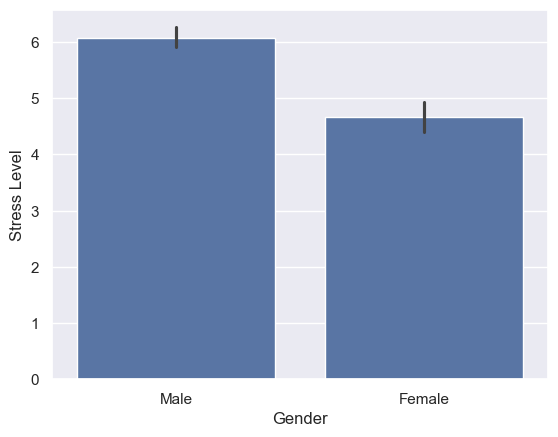

In [35]:
sns.barplot(data = df, x= 'Gender', y = 'Stress Level', estimator = np.mean);
# Nam sẽ có mức độ stress trung bình rơi vào 6 (max ~6.5 min~5.8)
# Nữ có mức độ stress trung bình thấp hơn so với nam ~4.3 (max ~5 min~4.2)

In [44]:
Age_category = ['27~35', '35~43', '43~50', '50~59'] # Chia độ tuổi thành 4 khung trải dài từ 27~59
Age = pd.qcut(df['Age'], 4, labels = Age_category)

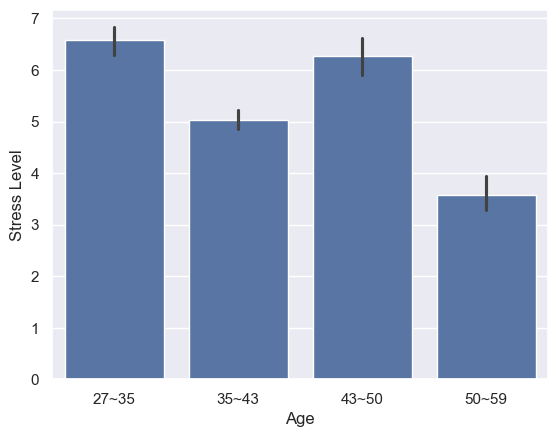

In [45]:
sns.barplot(data = df, x= Age, y = 'Stress Level', estimator = np.mean);
# Nhận thấy độ tuổi 27~35 vào 43~50 sẽ bị stress ở mức độ cao hơn so với 2 khung tuổi còn lại (trên mức 6)

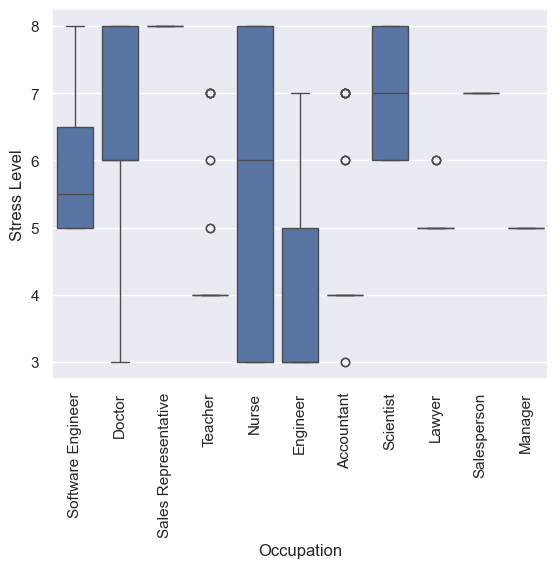

In [48]:
sns.boxplot(data = df, x = 'Occupation', y= 'Stress Level')
plt.xticks(rotation = 90);
# Một vài nghề nghiệp sẽ ảnh hưởng tới mức độ stress vì những đặc trưng của công việc

In [53]:
Sleep_duration_category = ['6~6.5', '6.5~7.5', '7.5~8.5']
Sleep_duration = pd.qcut(df['Sleep Duration'], 3, labels = Sleep_duration_category)

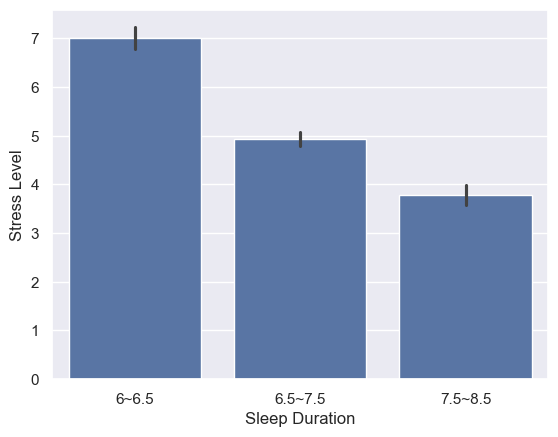

In [54]:
sns.barplot(data = df, x=Sleep_duration , y = 'Stress Level', estimator = np.mean);
# Biểu đồ cho thấy người dành nhiều thời gian cho giấc ngủ sẽ có cảm giác thư thái hơn người ít hoặc thiếu ngủ

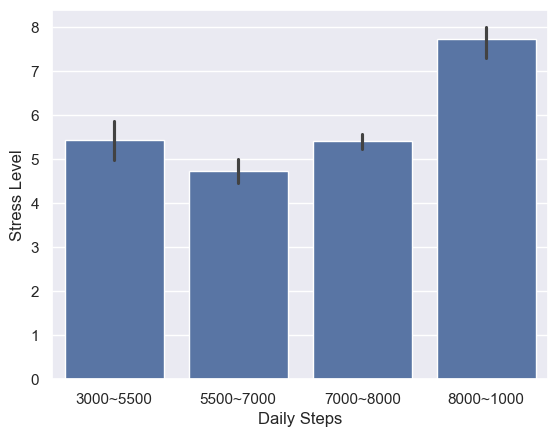

In [57]:
Daily_steps_category = ['3000~5500', '5500~7000', '7000~8000', '8000~1000']
Steps = pd.qcut(df['Daily Steps'], 4, labels = Daily_steps_category)
sns.barplot(data = df, x=Steps , y = 'Stress Level', estimator = np.mean);
# Mức độ hoạt động di chuyển ít hoặc nhiều của mỗi người cũng ảnh hưởng tới cảm giác căng thẳng, mệt mỏi

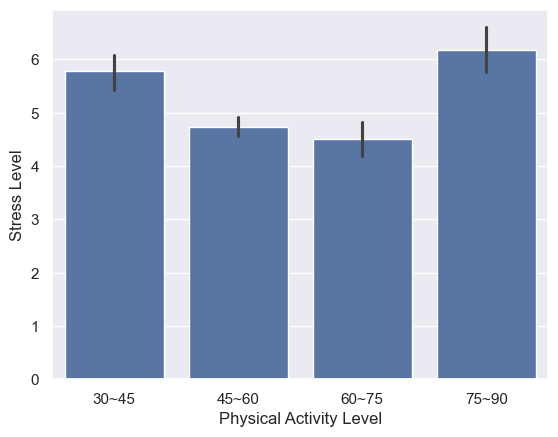

In [60]:
PAL_category = ['30~45','45~60','60~75','75~90']
PAL = pd.qcut(df['Physical Activity Level'], 4, labels = PAL_category)
sns.barplot(data = df, x=PAL , y = 'Stress Level', estimator = np.mean);
# Hoặc là mức độ tham gia các hoạt động khác ngoài việc di chuyển như là thể thao, làm việc, lái xe ...

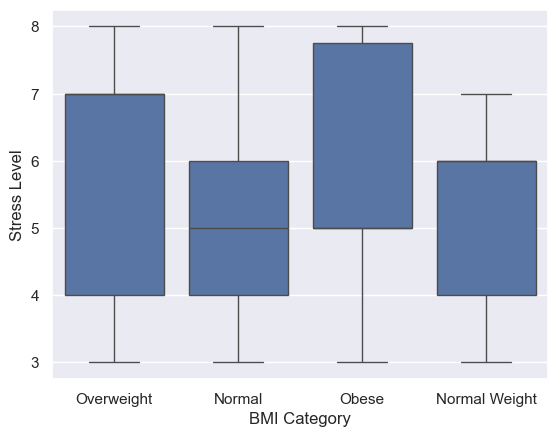

In [65]:
sns.boxplot(data = df, x = 'BMI Category', y= 'Stress Level');
# Tình trạng sức khỏe thể chất cũng có thể là một yếu tố dẫn đến mệt mỏi cơ thể
# Người có cân nặng cao di chuyển nhiều sẽ làm cơ thể mệt hơn hoặc béo phì dẫn đến sự tự ti về cơ thể nên bị stress

## Mô hình dự đoán

In [70]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [66]:
from sklearn.linear_model import LinearRegression

In [94]:
# Các cột sẽ ảnh hưởng đến đáng giá về mức độ sức khỏe tinh thần
Features = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Daily Steps', 'Physical Activity Level', 'BMI Category']
X = df[Features].values
Y = df['Stress Level'].values

In [95]:
X

array([['Male', 27, 'Software Engineer', ..., 4200, 42, 'Overweight'],
       ['Male', 28, 'Doctor', ..., 10000, 60, 'Normal'],
       ['Male', 28, 'Doctor', ..., 10000, 60, 'Normal'],
       ...,
       ['Female', 59, 'Nurse', ..., 7000, 75, 'Overweight'],
       ['Female', 59, 'Nurse', ..., 7000, 75, 'Overweight'],
       ['Female', 59, 'Nurse', ..., 7000, 75, 'Overweight']], dtype=object)

In [96]:
# Mã hóa các cột có text data (Gender, Occupation, BMI category)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 2, 6])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [97]:
X

array([[0.0, 1.0, 0.0, ..., 6.1, 4200, 42],
       [0.0, 1.0, 0.0, ..., 6.2, 10000, 60],
       [0.0, 1.0, 0.0, ..., 6.2, 10000, 60],
       ...,
       [1.0, 0.0, 0.0, ..., 8.1, 7000, 75],
       [1.0, 0.0, 0.0, ..., 8.1, 7000, 75],
       [1.0, 0.0, 0.0, ..., 8.1, 7000, 75]], dtype=object)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state=42)

In [103]:
dt_model = KNeighborsClassifier(n_neighbors=5)
dt_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [106]:
accuracy = dt_model.score(X_test, Y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9333333333333333
